In [19]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of records
num_records = 50000

# Generate Patient Demographics
data = {
    "PatientID": np.arange(1, num_records + 1),
    "Age": np.random.normal(50, 15, num_records).clip(18, 90).astype(int),
    "Gender": np.random.choice(["Male", "Female", "Other"], num_records, p=[0.48, 0.48, 0.04]),
    "Ethnicity": np.random.choice(["Caucasian", "Asian", "African American", "Hispanic", "Other"], num_records, p=[0.6, 0.2, 0.1, 0.05, 0.05]),
    "IncomeBracket": np.random.choice(["Low", "Medium", "High"], num_records, p=[0.5, 0.35, 0.15])
}

# Generate Clinical Information
data.update({
    "PrimaryDiagnosis": np.random.choice(["Diabetes", "Hypertension", "Pneumonia", "COPD", "Heart Failure"], num_records, p=[0.3, 0.25, 0.2, 0.15, 0.1]),
    "Comorbidities": np.random.poisson(2, num_records).clip(0, 5),
    "LengthOfStay": np.random.exponential(3, num_records).clip(1, 30).astype(int),
    "PreviousAdmissions": np.random.poisson(1, num_records).clip(0, 10)
})

# Generate Discharge Information
data.update({
    "DischargeStatus": np.random.choice(["Home", "Rehab Facility", "Deceased"], num_records, p=[0.8, 0.15, 0.05]),
    "FollowUpScheduled": np.random.choice(["Yes", "No"], num_records, p=[0.7, 0.3]),
    "MedicationAdherence": np.random.uniform(50, 100, num_records).round(1)
})

# Generate External Factors
data.update({
    "TransportationDifficulty": np.random.choice(["Yes", "No"], num_records, p=[0.2, 0.8]),
    "SupportSystem": np.random.choice(["None", "Minimal", "Strong"], num_records, p=[0.2, 0.5, 0.3])
})

# Outcome Variables
# Readmission likelihood based on simplified logic
readmission_prob = (
    0.3 * (data["Comorbidities"] / 5) +
    0.2 * (30 - data["MedicationAdherence"]) / 30 +
    0.2 * (data["LengthOfStay"] / 30) +
    0.15 * (data["PreviousAdmissions"] / 10) +
    0.15 * np.where(data["TransportationDifficulty"] == "Yes", 1, 0)
)

# Normalize probabilities and determine readmissions
readmission_prob = np.clip(readmission_prob, 0, 1)
data["Readmitted"] = np.random.binomial(1, readmission_prob).astype(bool)
data["DaysToReadmission"] = np.where(
    data["Readmitted"],
    np.random.randint(1, 31, num_records),
    0
)

# Create DataFrame
synthetic_data = pd.DataFrame(data)


In [30]:
synthetic_data

,Comorbidities,LengthOfStay,PreviousAdmissions,MedicationAdherence,TransportationDifficulty,Readmitted,DaysToReadmission
0,4,2,0,89.7,0,False,0
1,2,5,0,58.6,0,False,0
2,0,1,1,71.0,0,False,0
3,2,1,2,87.4,0,False,0
4,0,3,1,66.6,1,False,0
...,...,...,...,...,...,...,...
49995,3,1,1,80.3,0,False,0
49996,0,9,0,86.4,0,False,0
49997,5,10,2,74.3,0,False,0
49998,3,2,0,66.6,0,False,0


In [21]:
synthetic_data.isna().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
IncomeBracket,0
PrimaryDiagnosis,0
Comorbidities,0
LengthOfStay,0
PreviousAdmissions,0
DischargeStatus,0


In [22]:
#conversion of categorical variables to numerical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = synthetic_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    synthetic_data[column] = label_encoder.fit_transform(synthetic_data[column])

synthetic_data


,PatientID,Age,Gender,Ethnicity,IncomeBracket,PrimaryDiagnosis,Comorbidities,LengthOfStay,PreviousAdmissions,DischargeStatus,FollowUpScheduled,MedicationAdherence,TransportationDifficulty,SupportSystem,Readmitted,DaysToReadmission
0,1,57,1,1,2,2,4,2,0,2,1,89.7,0,0,False,0
1,2,47,1,2,1,1,2,5,0,2,1,58.6,0,0,False,0
2,3,59,0,2,0,3,0,1,1,1,0,71.0,0,1,False,0
3,4,72,0,2,1,4,2,1,2,0,0,87.4,0,0,False,0
4,5,46,1,0,1,4,0,3,1,1,0,66.6,1,0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,50,0,2,2,1,3,1,1,1,0,80.3,0,2,False,0
49996,49997,49,1,2,2,3,0,9,0,1,1,86.4,0,0,False,0
49997,49998,57,0,2,2,4,5,10,2,1,1,74.3,0,0,False,0
49998,49999,53,0,2,2,3,3,2,0,1,1,66.6,0,1,False,0


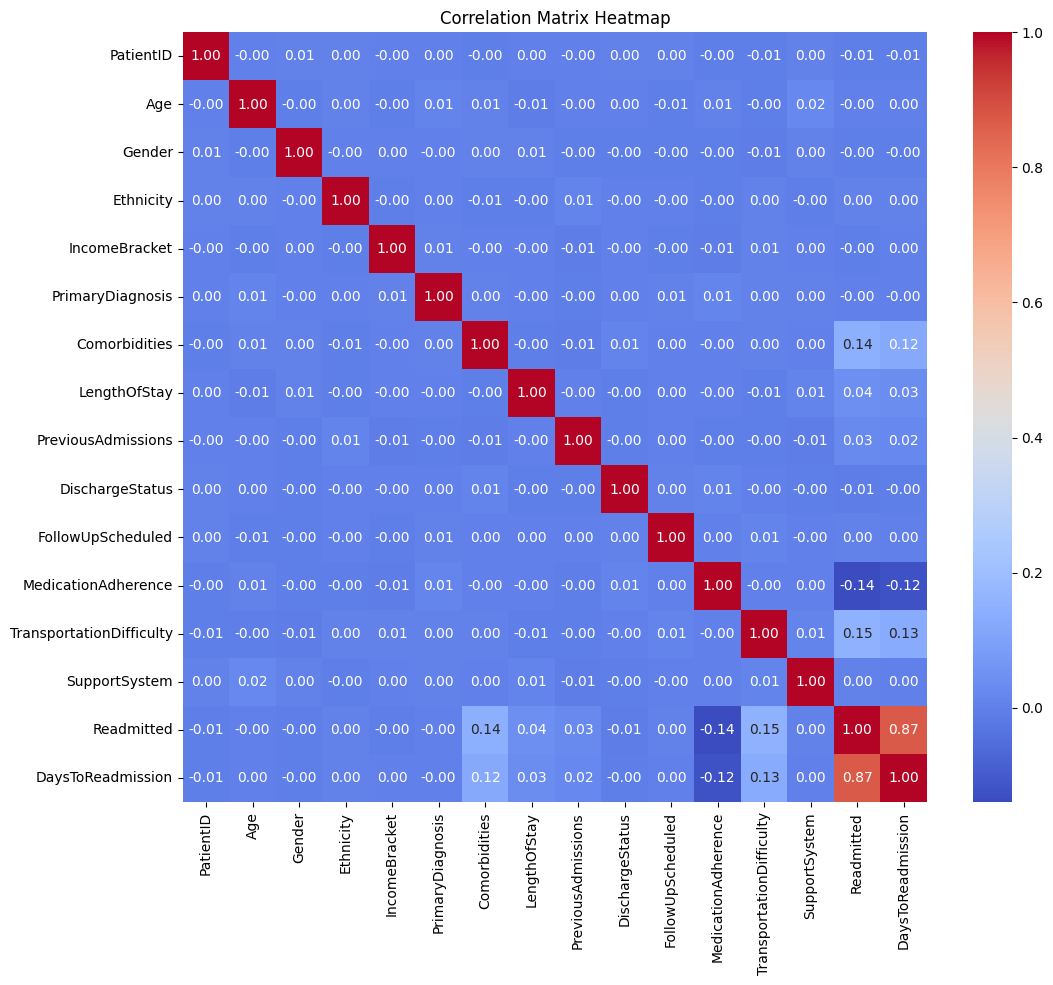

In [23]:
correlation_matrix = synthetic_data.corr()
plt.figure(figsize=(12, 10))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [24]:
#dropping insignificant columns
correlations = synthetic_data.corr()['Readmitted'].drop('Readmitted')  # Exclude output variable itself
threshold = 0.01  # Adjust this threshold as needed
insignificant_cols = correlations[abs(correlations) < threshold].index.tolist()
synthetic_data = synthetic_data.drop(columns=insignificant_cols)
synthetic_data

,Comorbidities,LengthOfStay,PreviousAdmissions,MedicationAdherence,TransportationDifficulty,Readmitted,DaysToReadmission
0,4,2,0,89.7,0,False,0
1,2,5,0,58.6,0,False,0
2,0,1,1,71.0,0,False,0
3,2,1,2,87.4,0,False,0
4,0,3,1,66.6,1,False,0
...,...,...,...,...,...,...,...
49995,3,1,1,80.3,0,False,0
49996,0,9,0,86.4,0,False,0
49997,5,10,2,74.3,0,False,0
49998,3,2,0,66.6,0,False,0


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# implementing logistic regression on data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = synthetic_data.drop('Readmitted', axis=1)  # Features
y = synthetic_data['Readmitted']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split data
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9998
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9823
        True       1.00      0.99      0.99       177

    accuracy                           1.00     10000
   macro avg       1.00      0.99      1.00     10000
weighted avg       1.00      1.00      1.00     10000

